<b>**NBA MVP Prediction Project** :</b>
Link to the dataset: https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share

This project utilizes a machine learning approach to predict the Most Valuable Player (MVP) for each NBA season based on player statistics. We employ a Random Forest Regressor, 
a powerful ensemble learning method known for its robustness and ability to handle a wide range of data types.

<b>**Data Importation and Cleaning**:</b>

We start by importing the necessary Python libraries for data handling, machine learning, and visualization. We load our dataset, 'NBA_Dataset.csv', into a pandas DataFrame.

First, we conduct a preliminary analysis to check for null values in the dataset. The majority of these null values appear in percentage-based statistics, such as three-point shooting percentages. 
The reason behind these null values is that some players have not attempted any shots of a certain type (e.g., three-pointers), leading to a division by zero situation. 
To handle these nulls, we replace them with zero, assuming the absence of attempts means the absence of success in those categories.

We also add a new binary column called 'mvp' to our DataFrame. This column indicates whether a player won the MVP award for a particular season.



<b>**Data Analysis and Visualization**:</b>
    
Before proceeding with model development, we visualize the distribution of the 'award_share' column, which indicates the proportion of MVP votes a player received in a season. We identify an imbalance in our dataset, 
as the majority of players did not receive any MVP votes in a given season.

To address this issue, we propose using undersampling, a technique that reduces the number of examples in the majority class. 
However, before doing this, we aim to understand the key factors influencing the 'award_share'. To achieve this, we create a correlation plot to visualize the relationship between 'award_share' and other statistics in the dataset.

From this analysis, we identify several key factors with the strongest correlation to 'award_share': 'vorp' (Value Over Replacement Player), 'ows' (Offensive Win Shares), 'fta_per_g' (Free Throws Attempted per Game), and 'pts_per_g' (Points per Game).



<b>**Undersampling and Dataset Preparation:**</b>
    
We conduct undersampling based on the identified factors, removing the bottom 25% of each category. This process aims to make the dataset more balanced and less biased towards players with zero 'award_share'.

Additionally, we align our dataset with the MVP eligibility criteria. From the 2024-2025 NBA season, new rules were introduced. To qualify for the MVP award,
a player must participate in at least 65 games during the season and must play a minimum of 20 minutes in each game. We introduce a threshold of 20 minutes per game and exclude players who don't meet this criterion from our dataset.

We also convert categorical variables 'pos' (player position) and 'team_id' (team identifier) into numerical values using label encoding.



<b>**Predictive Model Development and Evaluation:**</b>

We utilize the RandomForestRegressor from sklearn.ensemble for our predictive model. We define our features, which encompass both raw numbers (e.g., points per game, assists per game) and advanced metrics (e.g., win shares, player efficiency rating). 
The target variable is 'award_share', representing the proportion of MVP votes a player received in a given season.

For each NBA season, we train our model on all other seasons and use it to predict the 'award_share' of the current season. 
We compute the Root Mean Squared Error (RMSE) between the actual and predicted 'award_share' for each season. This error metric quantifies the model's prediction error, with lower values indicating better model performance.

After making predictions for each season, we identify the top 5 players with the highest predicted 'award_share' as our MVP candidates. 
These results provide insights into which players our model perceives as having the best chance of winning the MVP award.

We then calculate the average RMSE over all seasons to understand our model's average performance.



<b>**Data Visualization:**</b>
We create a scatter plot comparing the actual MVPs and our model's predictions for each season. On this plot, the x-axis represents the season, while the y-axis represents the 'award_share'. 
We use different colors to denote the actual and predicted MVPs. This visualization gives us an intuitive understanding of how our model performed in predicting the MVPs across multiple seasons.

<b>**Conclusion:**</b>
In conclusion, our project provides an application of machine learning in sports analytics, specifically in predicting the NBA's Most Valuable Player. 
Although our model's predictions are not 100% accurate, they provide valuable insights for further discussions and speculations about the MVP award. 
As with any machine learning project, there is always room for improvement. Future work could involve experimenting with different machine learning models, introducing additional features,
or adopting more sophisticated feature selection techniques.



<b>**Start of Coding Section**:</b>

In [44]:
#Objective: the objective is to find the players that are most likely to become an mvp for a season.
import pandas as pd # get dataset
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier 
d1 = pd.read_csv('NBA_Dataset.csv')
d1

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


In [45]:
# check for nulls to see if any of the columns have to many null to get an average mean
d1.isna().sum()

season                 0
player                 0
pos                    0
age                    0
team_id                0
g                      0
gs                     0
mp_per_g               0
fg_per_g               0
fga_per_g              0
fg_pct                63
fg3_per_g              0
fg3a_per_g             0
fg3_pct             2623
fg2_per_g              0
fg2a_per_g             0
fg2_pct              106
efg_pct               63
ft_per_g               0
fta_per_g              0
ft_pct               576
orb_per_g              0
drb_per_g              0
trb_per_g              0
ast_per_g              0
stl_per_g              0
blk_per_g              0
tov_per_g              0
pf_per_g               0
pts_per_g              0
mp                     0
per                    3
ts_pct                55
fg3a_per_fga_pct      63
fta_per_fga_pct       63
orb_pct                3
drb_pct                3
trb_pct                3
ast_pct                3
stl_pct                3


In [46]:
# there seems to be alot of nulls in the 3 point percentage category,we also recoginze
# that all null values are in the percentage categories,our hunch is that since the
# player did not shoot any 3's they would also obviously not make any and so it would be 0/0 resulting in a null value.
# the same can be said about all the other percentage based statistics.
d1[d1["fg3_pct"].isnull()][["player", "fg3a_per_g"]].head()

,player,fg3a_per_g
5,Dennis Awtrey,0.0
6,Carl Bailey,0.0
7,James Bailey,0.0
12,Mel Bennett,0.0
21,Brad Branson,0.0


In [47]:
d1[d1["ws_per_48"].isnull()][["player", "ws"]].head()

,player,ws
9728,Alex Scales,0.0
11274,JamesOn Curry,0.0
12759,Damion James,0.0


In [48]:
# we can see that this is true and so we will replace all nulls with 0
d1 = d1.fillna(0)

In [49]:
# since we want to predict who will be a mvp, we will add a column for the mvp for each season so that 
# we can make better predictions
d1['mvp'] = d1.groupby('season')['award_share'].transform(lambda x: x == x.max())
d1['mvp'] = d1['mvp'].astype(int)
d1

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695,0
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561,0
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341,0
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768,0
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500,0
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524,0
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646,0
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329,0


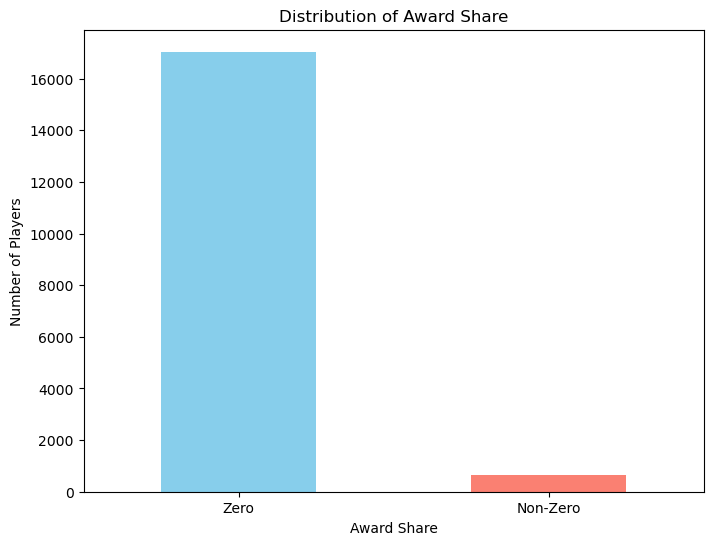

In [50]:
import matplotlib.pyplot as plt

import numpy as np

d1['has_award_share'] = np.where(d1['award_share'] > 0, 'Non-Zero', 'Zero')

award_share_counts = d1['has_award_share'].value_counts()

plt.figure(figsize=(8, 6))
award_share_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Award Share')
plt.xlabel('Award Share')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.show()

In [51]:
len(d1)

17697

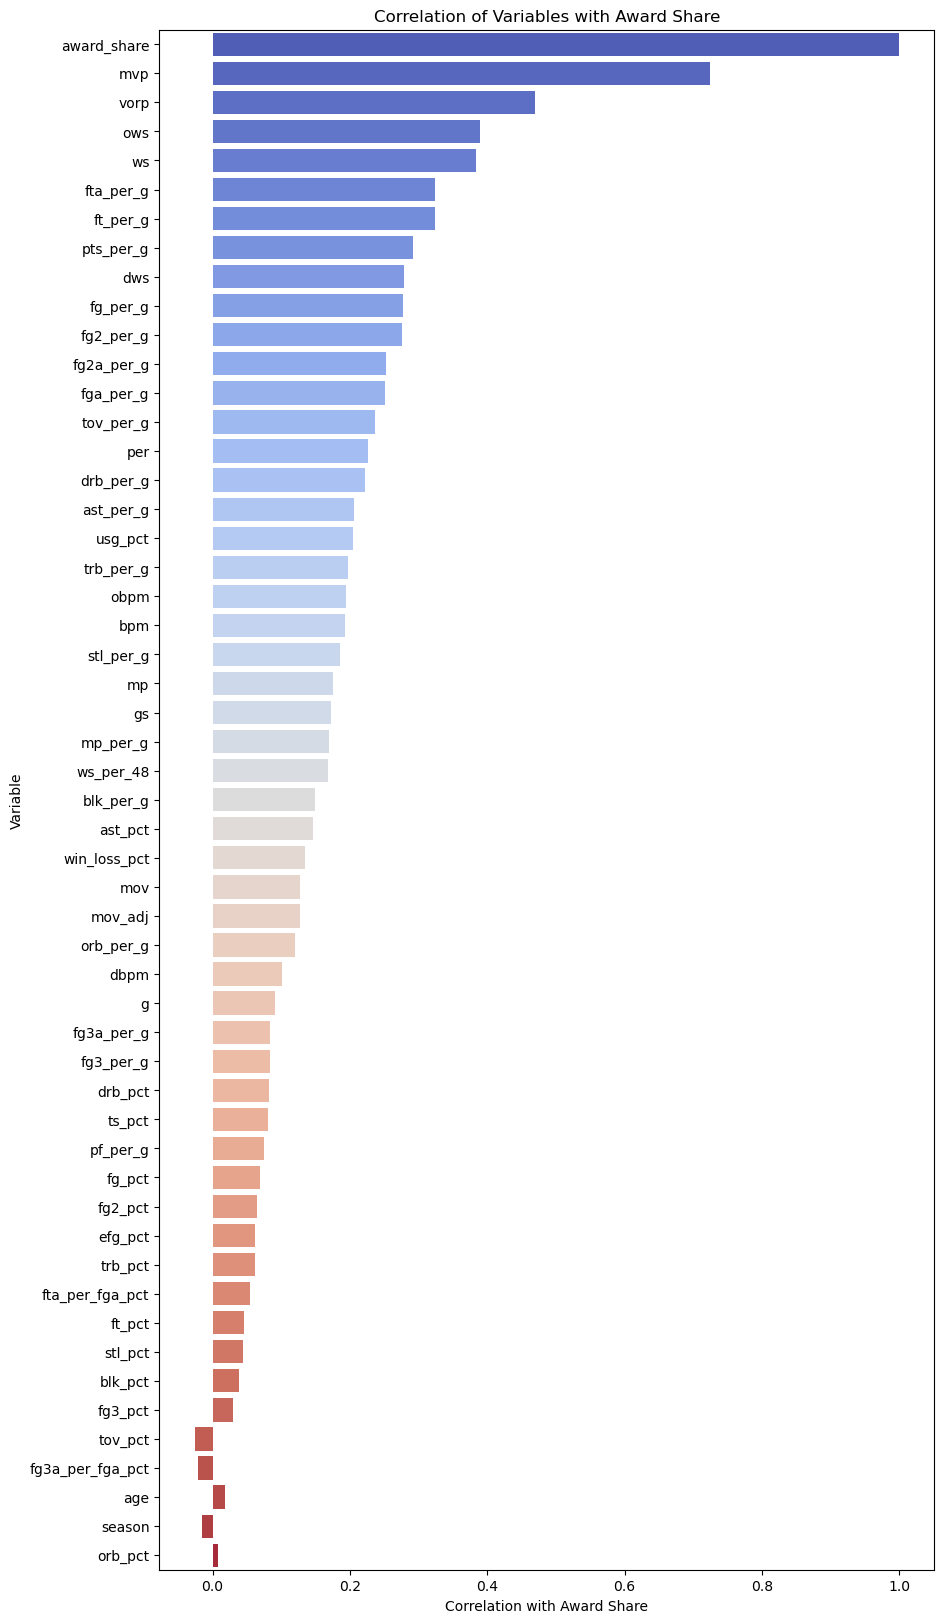

In [52]:

'''Before we proceed with the creation of our predictive model, it's crucial to understand the relationships between our target variable, 'award_share', and the other features in our dataset. This understanding will allow us to identify the most influential factors in determining the award shares of a player.

However, there's a challenge we need to address: our dataset is unbalanced. The majority of the players in our dataset have an 'award_share' of zero, meaning they didn't receive any MVP votes in a given season. This imbalance could bias our model towards predicting that players won't receive any MVP votes, which would limit the model's usefulness.

To address this issue, we plan to use a technique called undersampling. Undersampling involves reducing the number of examples in the majority class (in this case, players with zero 'award_share') to balance the dataset. But before we do that, we need to identify the key factors that influence 'award_share'. By understanding these factors, we can ensure that our undersampling process maintains the diversity and representativeness of these key features in our balanced dataset.

In the next step, we'll create a correlation plot to visualize the relationship between 'award_share' and all other statistics in our dataset. This will help us identify the factors that are most strongly correlated with 'award_share'. The medium article below was a good resource in understanding undersampling it also gave the option of oversampling as well[1]'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = d1.corr()


award_corr = corr_matrix['award_share']


award_corr_df = pd.DataFrame(award_corr)
award_corr_df.reset_index(inplace=True)
award_corr_df.columns = ['Variable', 'Correlation with Award Share']


award_corr_df['abs_correlation'] = award_corr_df['Correlation with Award Share'].abs()
sorted_corr_df = award_corr_df.sort_values('abs_correlation', ascending=False)


plt.figure(figsize=(10, 20))
sns.barplot(data=sorted_corr_df, y='Variable', x='Correlation with Award Share', palette='coolwarm')
plt.title('Correlation of Variables with Award Share')
plt.show()


In [53]:
''' from this we can see that vorp( value over replacement player), ows( offensive win shares),fta_per_g(free throws attempted per game)
and pts_per_gme(point per game) have the biggest correlation with award shares. Therefore we will be undersampling our data by removing the bottom 25% of each of these
catagories'''
import pandas as pd

# Calculate the 25th percentile for 'ows', 'fta_per_g', 'pts_per_g', and 'vorp'
ows_threshold = d1['ows'].quantile(0.25)
fta_per_g_threshold = d1['fta_per_g'].quantile(0.25)
pts_per_g_threshold = d1['pts_per_g'].quantile(0.25)
vorp_threshold = d1['vorp'].quantile(0.25)

# Create a mask for players with 'ows', 'fta_per_g', 'pts_per_g', and 'vorp' above the thresholds
mask = (d1['ows'] > ows_threshold) & (d1['fta_per_g'] > fta_per_g_threshold) & (d1['pts_per_g'] > pts_per_g_threshold) & (d1['vorp'] > vorp_threshold)

# Apply the mask to the DataFrame to keep only the players above the thresholds
d1 = d1[mask]


In [54]:
len(d1)

8484

In [55]:
''' Correlation analysis can serve as a useful tool for undersampling, allowing us to focus on the most relevant data. However, it's also important to consider the eligibility criteria for the MVP award when deciding which data to include in our model. By understanding these criteria, we can further refine our dataset to exclude players who are unlikely to qualify for the MVP award.

Starting from the 2024-2025 NBA season, new eligibility rules were introduced. To qualify for the MVP award, a player must have participated in at least 65 games during the season and must have played a minimum of 20 minutes in each game. While there have been instances in the past where players have won the MVP award despite playing fewer than 65 games, there are no instances of an MVP averaging less than 20 minutes per game.

Therefore, to align our dataset with these eligibility criteria, we will introduce a threshold of 20 minutes per game. This means we will only include players in our dataset who, on average, played at least 20 minutes per game during the season.'''

mask = d1['mp_per_g'] >= 20
d1=d1[mask]

In [56]:
len(d1)

6882

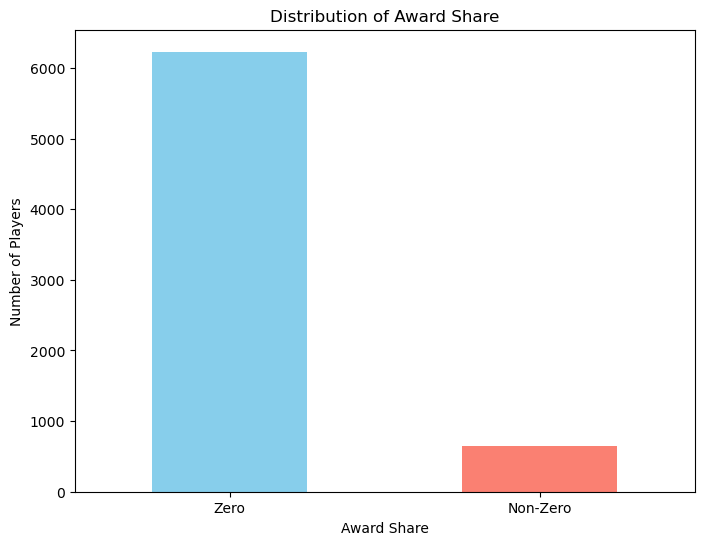

In [57]:
# Count the number of players with zero and non-zero 'award_share'
award_share_counts = d1['has_award_share'].value_counts()

plt.figure(figsize=(8, 6))
award_share_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Award Share')
plt.xlabel('Award Share')
plt.ylabel('Number of Players')
plt.xticks(rotation=0)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

d1 = d1.sort_values('season')

pos_le = LabelEncoder()
team_id_le = LabelEncoder()

d1['pos'] = pos_le.fit_transform(d1['pos'])
d1['team_id'] = team_id_le.fit_transform(d1['team_id'])

features = ['pos', 'age', 'team_id', 'g', 'gs', 'mp_per_g', 'fg_per_g', 'fga_per_g', 'fg_pct', 'fg3_per_g', 'fg3a_per_g', 'fg3_pct', 'fg2_per_g', 'fg2a_per_g', 'fg2_pct', 'efg_pct', 'ft_per_g', 'fta_per_g', 'ft_pct', 'orb_per_g', 'drb_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g', 'tov_per_g', 'pf_per_g', 'pts_per_g', 'mp', 'per', 'ts_pct', 'fg3a_per_fga_pct', 'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'ows', 'dws', 'ws', 'ws_per_48', 'obpm', 'dbpm', 'bpm', 'vorp', 'mov', 'mov_adj', 'win_loss_pct']

X = d1[features]
y = d1['award_share']


model = RandomForestRegressor(n_estimators=100, random_state=42)

rmse_list = []

unique_seasons = d1['season'].unique()

for season in unique_seasons:
    X_train = X[d1['season'] != season]
    y_train = y[d1['season'] != season]
    X_test = X[d1['season'] == season]
    y_test = y[d1['season'] == season]

    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

    X_test_copy = X_test.copy()

    X_test_copy['predicted_award_share'] = predictions
    X_test_copy['player'] = d1[d1['season'] == season]['player']

    top_players = X_test_copy.nlargest(5, 'predicted_award_share')['player']
    print(f"Top 5 players for season {season}: {top_players.tolist()}")

print(f"Average Root Mean Squared Error: {np.mean(rmse_list)}")


Top 5 players for season 1982: ['Moses Malone', 'Julius Erving', 'Larry Bird', 'Magic Johnson', 'Kareem Abdul-Jabbar']
Top 5 players for season 1983: ['Moses Malone', 'Larry Bird', 'Adrian Dantley', 'Magic Johnson', 'Julius Erving']
Top 5 players for season 1984: ['Larry Bird', 'Magic Johnson', 'Adrian Dantley', 'Bernard King', 'Kiki Vandeweghe']
Top 5 players for season 1985: ['Larry Bird', 'Magic Johnson', 'Michael Jordan', 'Moses Malone', 'Isiah Thomas']
Top 5 players for season 1986: ['Larry Bird', 'Magic Johnson', 'Adrian Dantley', 'Kareem Abdul-Jabbar', 'Charles Barkley']
Top 5 players for season 1987: ['Magic Johnson', 'Larry Bird', 'Michael Jordan', 'Dominique Wilkins', 'Kevin McHale']
Top 5 players for season 1988: ['Michael Jordan', 'Larry Bird', 'Charles Barkley', 'Dominique Wilkins', 'Magic Johnson']
Top 5 players for season 1989: ['Michael Jordan', 'Magic Johnson', 'Charles Barkley', 'John Stockton', 'Karl Malone']
Top 5 players for season 1990: ['Magic Johnson', 'Michael 

In [41]:
'''We employ a Random Forest Regressor, a powerful ensemble learning method, to make our predictions. 

Our dataset, represented by the DataFrame 'd1', contains a variety of player statistics and award shares for each season. To maintain chronological order, we sort the DataFrame by the 'season' column. 

We then transform the categorical variables 'pos' (player position) and 'team_id' (team identifier) into numerical values using label encoding. This transformation is necessary because machine learning algorithms typically require numerical input. 

Next, we define the features that will be used to train our model. These features encompass a wide range of player statistics, including both raw numbers (e.g., points per game, assists per game) and advanced metrics (e.g., win shares, player efficiency rating). The target variable we aim to predict is 'award_share', which represents the proportion of MVP votes a player received in a given season.

We initialize a Random Forest Regressor model with 100 trees and a random state for reproducibility. We also create an empty list to store the Root Mean Squared Error (RMSE) for each season, which will be used to evaluate our model's performance.

The unique seasons in the dataset are identified, and for each season, we split the data into a training set (all other seasons) and a test set (the current season). The model is then trained on the training set and used to make predictions on the test set.

The model's performance is evaluated by calculating the RMSE between the actual and predicted award shares for the test set. This RMSE is added to our list of RMSEs.

To identify the top MVP candidates for each season, we add the predicted award shares to the test set, along with the player names. We then select the top 5 players based on their predicted award shares.

Finally, we print the average RMSE over all folds, providing an overall measure of our model's performance. The lower the RMSE, the better the model's performance.

This study demonstrates the potential of machine learning techniques, specifically the Random Forest Regressor, in predicting NBA MVPs based on player statistics. The results could be used to inform discussions and predictions about future MVP candidates.'''

"We employ a Random Forest Regressor, a powerful ensemble learning method, to make our predictions. \n\nOur dataset, represented by the DataFrame 'd1', contains a variety of player statistics and award shares for each season. To maintain chronological order, we sort the DataFrame by the 'season' column. \n\nWe then transform the categorical variables 'pos' (player position) and 'team_id' (team identifier) into numerical values using label encoding. This transformation is necessary because machine learning algorithms typically require numerical input. \n\nNext, we define the features that will be used to train our model. These features encompass a wide range of player statistics, including both raw numbers (e.g., points per game, assists per game) and advanced metrics (e.g., win shares, player efficiency rating). The target variable we aim to predict is 'award_share', which represents the proportion of MVP votes a player received in a given season.\n\nWe initialize a Random Forest Regre

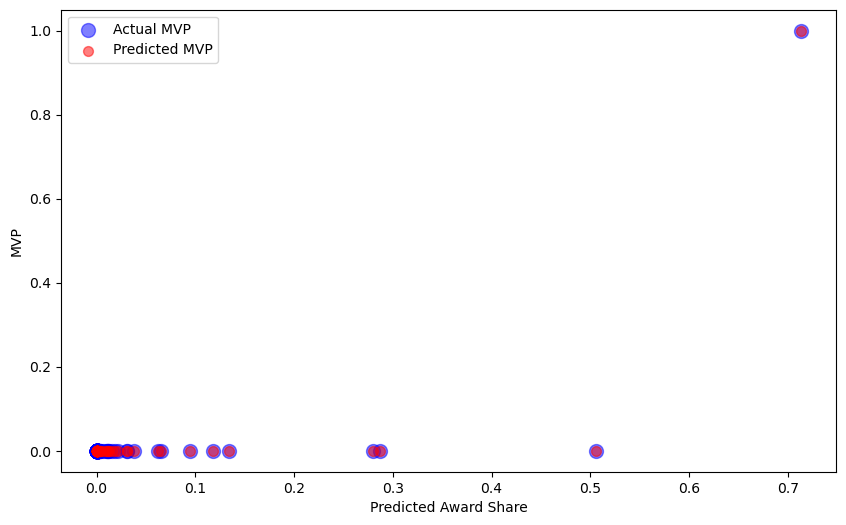

In [43]:
# Add the 'mvp' column to the test set
X_test_copy['mvp'] = d1[d1['season'] == season]['mvp']

X_test_copy['predicted_mvp'] = (X_test_copy['predicted_award_share'] == X_test_copy['predicted_award_share'].max()).astype(int)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test_copy['predicted_award_share'], X_test_copy['mvp'], color='blue', label='Actual MVP', s=100, alpha=0.5)
plt.scatter(X_test_copy['predicted_award_share'], X_test_copy['predicted_mvp'], color='red', label='Predicted MVP', s=50, alpha=0.5)
plt.xlabel('Predicted Award Share')
plt.ylabel('MVP')
plt.legend()
plt.show()


In [ ]:
'''In this study, we utilized a RandomForestRegressor model to predict the Most Valuable Player (MVP) for each NBA season based on a variety of player statistics. The model demonstrated promising results, but there are several other techniques and approaches that could be explored in future work to potentially improve the accuracy of the predictions.

Different Machine Learning Models: While the RandomForestRegressor was effective, other machine learning models could also be suitable for this task. Models such as Gradient Boosting, Support Vector Machines, or Neural Networks could potentially offer improved performance.

Feature Engineering: The creation of new features from the existing data could help improve the model's performance. For example, interaction terms, polynomial features, or domain-specific features could be added.

Hyperparameter Tuning: We used a basic configuration for the RandomForestRegressor model. The performance might be improved by tuning the hyperparameters of the model, such as the number of trees, the maximum depth of the trees, or the minimum number of samples required to split an internal node.

Ensemble Methods: Combining the predictions of several models could lead to more accurate predictions. Techniques such as bagging, boosting, or stacking could be explored.

Deep Learning Models: For a more advanced approach, deep learning models could be used. These models can capture complex patterns and interactions in the data, which might lead to improved performance.

Incorporating Additional Data: Additional data, such as player injuries, trades, team performance, or even social media sentiment, could be incorporated into the model to potentially improve its predictive accuracy.

Oversampling: we could have oversampled the data instead of undersampling and that perhaps may have been a better way to solve the problem of imbalanced data
In conclusion, while our model provides a solid foundation and achieves reasonable performance, there are numerous avenues for further exploration and improvement. Future work will focus on investigating these alternative techniques and incorporating additional data to continue to enhance the accuracy of our MVP predictions.'''




'''refreneces'''

'''https://medium.com/grabngoinfo/four-oversampling-and-under-sampling-methods-for-imbalanced-classification-using-python-7304aedf9037'''

Our Dataset: https://www.kaggle.com/datasets/robertsunderhaft/nba-player-season-statistics-with-mvp-win-share
